# Big Mart Sales Prediction

### Objective: Develop a ML model to predict the sales of each product at a particular outlet.

### Problem Statement details:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

### Data Dictionary:
Train (8523) and Test (5681) data set, train data set has both input and output variable(s). Need to predict the sales for test data set.

Link: https://www.analyticsvidhya.com/datahack/contest/practice-problem-big-mart-sales-iii/


### Code structure:
1. Importing Libraries & Datasets
2. Data Overview & Checking
3. Univariate analysis on the numerical variables
4. Bivariate analysis on the numerical variables
5. Training dataset Data handling
5a. Handling Missing values
5b. Other Data handling
6. Data processing for Model development
7. Model Development - Linear regression, Random Forest, XGBoost Regressor and Decision Tree Regressor
8. Preparing the Test dataset for prediction
9. Predicting in the Test data for Final Submission

## 1) Importing Libraries & Datasets

In [1]:
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

import miceforest as mf
from sklearn.impute import KNNImputer

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df_Train = pd.read_csv('C:/Users/argop/OneDrive/Desktop/Python/GL Assignments/Big Mart Sales Prediction/Data/train_v9rqX0R.csv')
df_Test = pd.read_csv('C:/Users/argop/OneDrive/Desktop/Python/GL Assignments/Big Mart Sales Prediction/Data/test_AbJTz2l.csv')

In [4]:
# Rows in Train data
print("number of rows in Train dataset: ", df_Train.shape[0])

# Columns in Train data
print("number of columns in Train dataset: ", df_Train.shape[1])

number of rows in Train dataset:  8523
number of columns in Train dataset:  12


In [5]:
# Rows in Test data
print("number of rows in Test dataset: ", df_Test.shape[0])

# Columns in Test data
print("number of columns in Test dataset: ", df_Test.shape[1])

number of rows in Test dataset:  5681
number of columns in Test dataset:  11


In [6]:
df_Train.head()

df_Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## 2) Data Overview and checking

In [7]:
#Checking the columns in the dataset
print(df_Train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [8]:
print(df_Test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


In [9]:
print("Count total NaN at each column in the Train DataFrame: \n ", df_Train.isnull().sum())

Missing_percent1 = round((df_Train.isnull().sum() * 100 / len(df_Train)),1).sort_values(ascending=False)
print("\n % of missing values in each column in the Train dataset is:\n", Missing_percent1)

Count total NaN at each column in the Train DataFrame: 
  Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 % of missing values in each column in the Train dataset is:
 Outlet_Size                  28.3
Item_Weight                  17.2
Item_Identifier               0.0
Item_Fat_Content              0.0
Item_Visibility               0.0
Item_Type                     0.0
Item_MRP                      0.0
Outlet_Identifier             0.0
Outlet_Establishment_Year     0.0
Outlet_Location_Type          0.0
Outlet_Type                   0.0
Item_Outlet_Sales             0.0
dtype: float64


In [10]:
print("Count total NaN at each column in the Test DataFrame: \n ", df_Test.isnull().sum())

Count total NaN at each column in the Test DataFrame: 
  Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [11]:
duplicate_Train = df_Train[df_Train.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate_Train

Duplicate Rows :


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [12]:
duplicate_Test = df_Test[df_Test.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate_Test

Duplicate Rows :


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [13]:
table = pd.pivot_table(df_Train, values='Item_Outlet_Sales', index='Item_Identifier', columns='Outlet_Identifier', aggfunc='sum').round(1)
print(table)

Outlet_Identifier  OUT010  OUT013  OUT017  OUT018  OUT019  OUT027  OUT035  \
Item_Identifier                                                             
DRA12               283.6  2552.7  2552.7   850.9     NaN     NaN   992.7   
DRA24               327.6  4422.2  1146.5     NaN   491.4  4913.6  3439.5   
DRA59               185.1   555.3  2406.2  4442.2   555.3  7033.5     NaN   
DRB01                 NaN  2466.8     NaN     NaN     NaN   569.3     NaN   
DRB13               948.8  3605.3  3415.6     NaN     NaN     NaN   569.3   
...                   ...     ...     ...     ...     ...     ...     ...   
NCZ30               241.0   602.5   964.1     NaN     NaN  3374.3  2530.7   
NCZ41                 NaN   876.2  2503.4  1877.6     NaN     NaN  1752.4   
NCZ42               711.1  5451.6  4029.4     NaN     NaN     NaN  4266.4   
NCZ53               376.8  3203.2     NaN  1884.2     NaN  5652.6     NaN   
NCZ54               324.9     NaN     NaN  2599.3   162.5  5523.5     NaN   

In [14]:
x=df_Train.groupby("Item_Identifier")["Outlet_Identifier"].value_counts().to_frame()
x
total_sum = x['count'].sum()
print("The Sum of the count by Item identifier and Outlet identifier is:",total_sum)

count
Item_Identifier Outlet_Identifier       
DRA12           OUT010                 1
                OUT013                 1
                OUT045                 1
                OUT035                 1
                OUT018                 1
...                                  ...
NCZ54           OUT027                 1
                OUT019                 1
                OUT018                 1
                OUT010                 1
                OUT049                 1

[8523 rows x 1 columns]

The Sum of the count by Item identifier and Outlet identifier is: 8523


In [15]:
#Create NEW VARIABLE: Item_Outlet_Identifier by concatenating the columns Item_Identifier and Outlet_Identifier. 
#Dataset is unique at this level
df_Train['Item_Outlet_Identifier'] = df_Train['Item_Identifier'].str.cat(df_Train['Outlet_Identifier'], sep='-')
df_Train.head()

df_Test['Item_Outlet_Identifier'] = df_Test['Item_Identifier'].str.cat(df_Test['Outlet_Identifier'], sep='-')
df_Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Identifier
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15-OUT049
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01-OUT018
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15-OUT049
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FDX07-OUT010
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19-OUT013


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Identifier
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,FDW58-OUT049
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,FDW14-OUT017
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NCN55-OUT010
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,FDQ58-OUT017
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,FDY38-OUT027


In [16]:
print("#Rows in Training data:")
df_Train['Item_Outlet_Identifier'].nunique()

print("#Rows in Test data:")
df_Test['Item_Outlet_Identifier'].nunique()

#Rows in Training data:


8523

#Rows in Test data:


5681

### Key Points:
1. Missing values are there in columns: **Item_Weight** and **Outlet_size** in both Train and Test datasets. Imputation is required for these fields.
2. The Sale amount for the same item is different in each store. Thus, the dataset is unique at Item identifier and Outlet identifer grain. Hence, created a synthetic unique column called **Item_Outlet_Identifier (by concatenating Item_Identifier and Outlet_Identifier columns)**
3. The is no duplication in either Train or Test dataset.

### 3) Univariate analysis on the numerical variables

In [17]:
df_Train_numeric = df_Train.select_dtypes(include='number')
df_Train_numeric.describe().applymap('{:,.1f}'.format).T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,"7,060.0",12.9,4.6,4.6,8.8,12.6,16.9,21.4
Item_Visibility,"8,523.0",0.1,0.1,0.0,0.0,0.1,0.1,0.3
Item_MRP,"8,523.0",141.0,62.3,31.3,93.8,143.0,185.6,266.9
Outlet_Establishment_Year,"8,523.0","1,997.8",8.4,"1,985.0","1,987.0","1,999.0","2,004.0","2,009.0"
Item_Outlet_Sales,"8,523.0","2,181.3","1,706.5",33.3,834.2,"1,794.3","3,101.3","13,087.0"


In [18]:
columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for col in columns:
    print("-----------Column is:",col,"---------------")
    #pd.set_option('display.float_format', '{:.1%}'.format)
    display(df_Train[col].value_counts(normalize=True))

-----------Column is: Item_Fat_Content ---------------


Item_Fat_Content
Low Fat    0.597090
Regular    0.338965
LF         0.037076
reg        0.013728
low fat    0.013141
Name: proportion, dtype: float64

-----------Column is: Item_Type ---------------


Item_Type
Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: proportion, dtype: float64

-----------Column is: Outlet_Size ---------------


Outlet_Size
Medium    0.456895
Small     0.390643
High      0.152462
Name: proportion, dtype: float64

-----------Column is: Outlet_Location_Type ---------------


Outlet_Location_Type
Tier 3    0.393054
Tier 2    0.326763
Tier 1    0.280183
Name: proportion, dtype: float64

-----------Column is: Outlet_Type ---------------


Outlet_Type
Supermarket Type1    0.654347
Grocery Store        0.127068
Supermarket Type3    0.109703
Supermarket Type2    0.108882
Name: proportion, dtype: float64

Text(0.5, 0.98, 'Graphs for Item_Weight and Item_Visibility ')

<Axes: xlabel='Item_Weight', ylabel='Count'>

<Axes: xlabel='Item_Weight'>

<Axes: xlabel='Item_Visibility', ylabel='Count'>

<Axes: xlabel='Item_Visibility'>

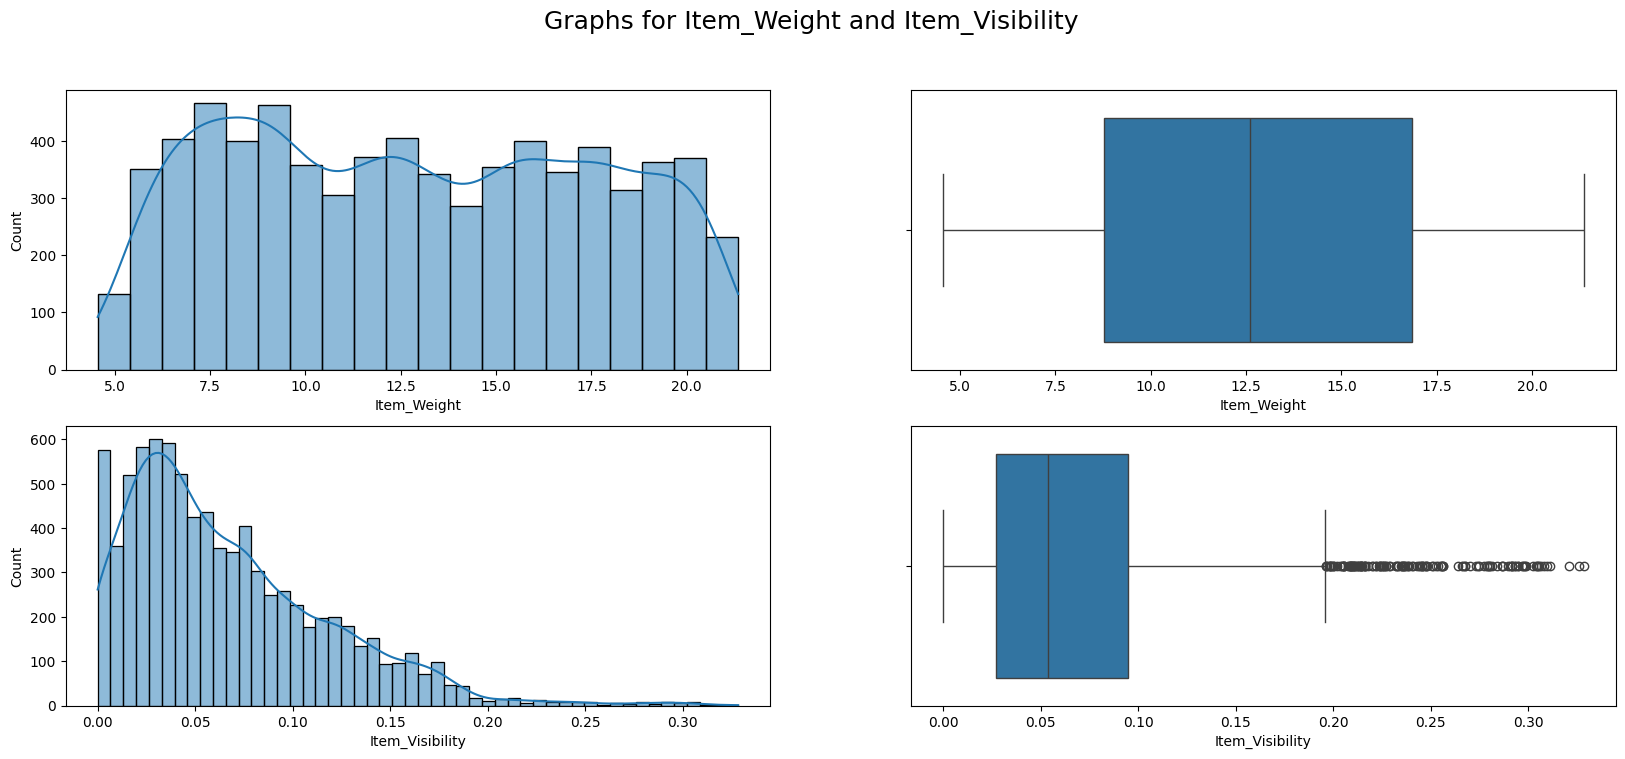

In [19]:
#Histogram and Boxplot for the numerical variables - Item_Weight and Item_Visibility 
fig, axes = plt.subplots(2, 2, figsize = (20, 8))
fig.suptitle('Graphs for Item_Weight and Item_Visibility ', fontsize = 18)

sns.histplot(x = 'Item_Weight', data = df_Train, kde = True, ax = axes[0,0]);
sns.boxplot(x = 'Item_Weight', data = df_Train, ax = axes[0,1])

sns.histplot(x = 'Item_Visibility', data = df_Train, kde = True, ax = axes[1,0]);
sns.boxplot(x = 'Item_Visibility', data = df_Train, ax = axes[1,1])

Text(0.5, 0.98, 'Graphs for Item_MRP and Item_Outlet_Sales ')

<Axes: xlabel='Item_MRP', ylabel='Count'>

<Axes: xlabel='Item_MRP'>

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

<Axes: xlabel='Item_Outlet_Sales'>

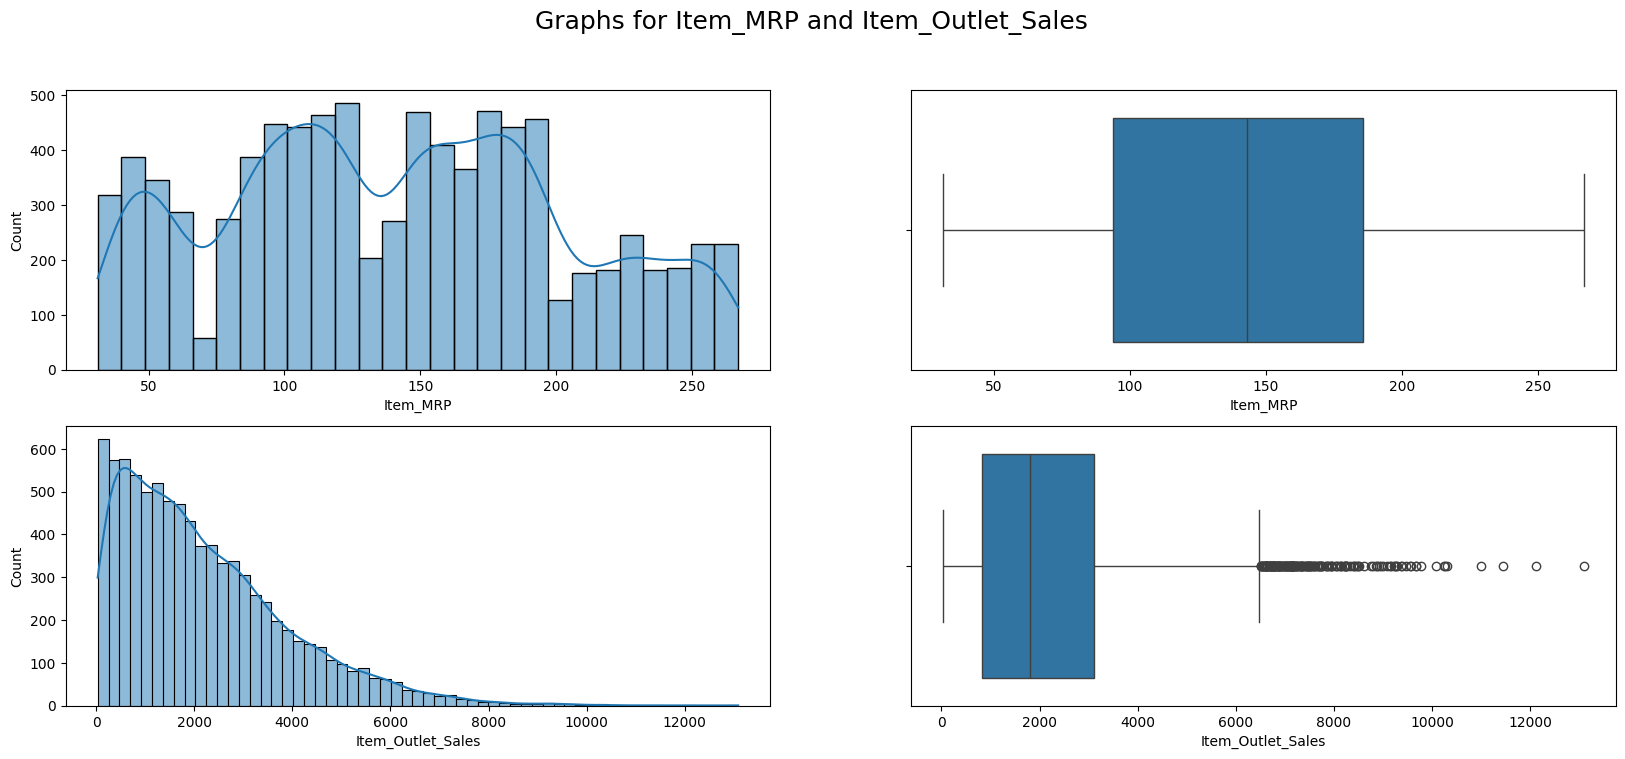

In [20]:
#Histogram and Boxplot for the numerical variables - Item_MRP and Item_Outlet_Sales 
fig, axes = plt.subplots(2, 2, figsize = (20, 8))
fig.suptitle('Graphs for Item_MRP and Item_Outlet_Sales ', fontsize = 18)

sns.histplot(x = 'Item_MRP', data = df_Train, kde = True, ax = axes[0,0]);
sns.boxplot(x = 'Item_MRP', data = df_Train, ax = axes[0,1])

sns.histplot(x = 'Item_Outlet_Sales', data = df_Train, kde = True, ax = axes[1,0]);
sns.boxplot(x = 'Item_Outlet_Sales', data = df_Train, ax = axes[1,1])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

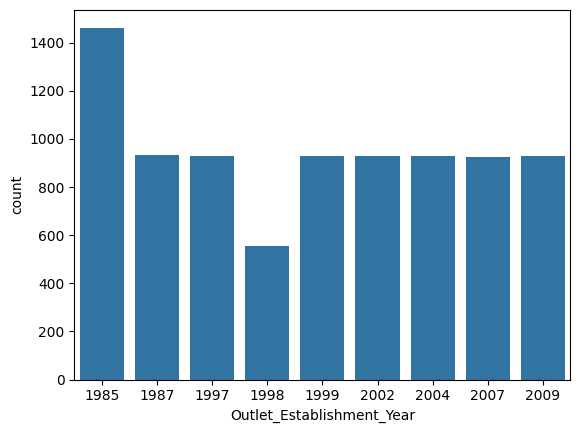

In [21]:
#Barchart for the variable - Outlet_Establishment_Year 
sns.countplot(x='Outlet_Establishment_Year', data=df_Train)
plt.show()

In [22]:
#Creating a NEW COLUMN: Store_age
import datetime as dt
current_year = dt.datetime.today().year
current_year
df_Train['Store_age'] = current_year - df_Train['Outlet_Establishment_Year']
df_Train.head()

2026

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Identifier,Store_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15-OUT049,27
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01-OUT018,17
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15-OUT049,27
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FDX07-OUT010,28
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19-OUT013,39


Text(0.5, 0.98, 'Graphs for Store_age')

<Axes: xlabel='Store_age', ylabel='Count'>

<Axes: xlabel='Store_age'>

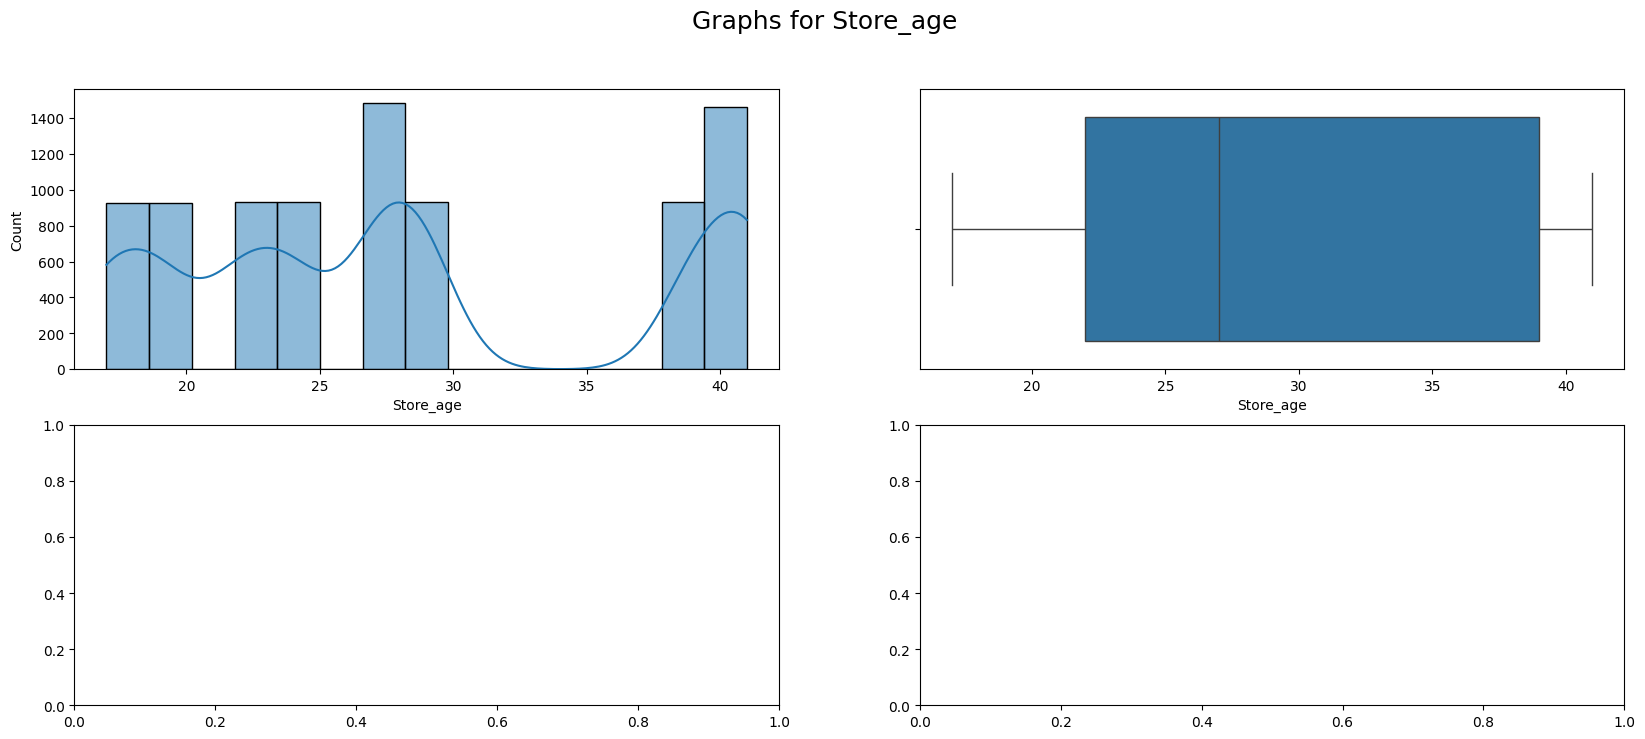

In [23]:
#Histogram and Boxplot for the newly created variable - Store_age
fig, axes = plt.subplots(2, 2, figsize = (20, 8))
fig.suptitle('Graphs for Store_age', fontsize = 18)

sns.histplot(x = 'Store_age', data = df_Train, kde = True, ax = axes[0,0]);
sns.boxplot(x = 'Store_age', data = df_Train, ax = axes[0,1])

### Key Points:
1. There are no real outliers in the numerical variable that require any treatment.
2. The distribution of Item_Visibility and Item_Outlet_Sales variables are left-skewed.
3. Item_Fat_Content: There are different variations of Low Fat and Regular Fat, this must be standardized later on.
4. Top 5 selling items: Fruits and Vegetables, Snack Foods, Household, Frozen Foods and Dairy that make up ~60% of the sales. This is expected given this is a Supermarket/Grocery store.

### 4) Bivariate analysis on the numerical variables

In [24]:
df_Train.groupby(['Outlet_Type','Outlet_Identifier']).agg({ 'Item_Outlet_Identifier': 'count'})

Item_Outlet_Identifier
Outlet_Type       Outlet_Identifier                        
Grocery Store     OUT010                                555
                  OUT019                                528
Supermarket Type1 OUT013                                932
                  OUT017                                926
                  OUT035                                930
                  OUT045                                929
                  OUT046                                930
                  OUT049                                930
Supermarket Type2 OUT018                                928
Supermarket Type3 OUT027                                935

The correlation heatmap for the numerical variables:


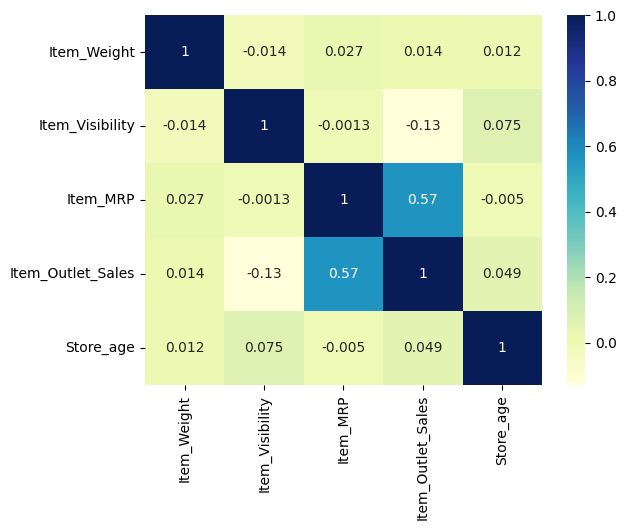

In [25]:
#Corelation matrix for numerical variables
cols=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales','Store_age']

dataplot = sns.heatmap(df_Train[cols].corr(), cmap="YlGnBu", annot=True)
print("The correlation heatmap for the numerical variables:")
# displaying heatmap
plt.show()

### Key Points:
1. Outlets OUT010 and OUT019 pertain to Grocery outlet type; OUT018 and OUT027 pertain to Supermarket Type2 and Supermarket Type3 outlet type respectovely. Lastly, 6 outlets belong to Supermarket Type1 type of outlets.
2. Correlation - High correlation between Price of the Item (Item_MRP) and the dependent variable Sales (Item_Outlet_Sales). This is expected. Nothing else comes out strongly here.

## 5) Training dataset Data Handling

### 5a) Handling Missinng values

#### Variable: Item Weight

In [26]:
#df_Train['ID'] = np.arange(df_Train.shape[0])

In [27]:
#df_Train['ID'].min()
#df_Train['ID'].max()

In [28]:
mean_weight = df_Train['Item_Weight'].mean()
median_weight = df_Train['Item_Weight'].median()

print("The mean weight of the items is:", round(mean_weight,1))
print("The mean weight of the items is:", round(median_weight,1))

df_Train['Item_Weight_Mean'] = df_Train['Item_Weight'].fillna(mean_weight)
df_Train['Item_Weight_Median'] = df_Train['Item_Weight'].fillna(median_weight)

The mean weight of the items is: 12.9
The mean weight of the items is: 12.6


In [29]:
df_Train_copy = df_Train.copy(deep = True)
df_Train_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Identifier,Store_age,Item_Weight_Mean,Item_Weight_Median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15-OUT049,27,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01-OUT018,17,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15-OUT049,27,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FDX07-OUT010,28,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19-OUT013,39,8.93,8.93


In [30]:
df_Train_copy_for_impute=df_Train_copy[['Item_Weight']]
df_Train_copy_for_impute.head()

,Item_Weight
0,9.30
1,5.92
2,17.50
3,19.20
4,8.93


In [31]:
# Create kernels.  #mice forest
kernel = mf.ImputationKernel(
  data=df_Train_copy_for_impute,
  save_all_iterations=True,
  random_state=1343
)


#KNN Imputation
impute = KNNImputer() #KNN imputation
KNNImputed = impute.fit_transform(df_Train_copy_for_impute)
KNNImputed = pd.DataFrame(KNNImputed, columns = df_Train_copy_for_impute.columns).round(1)

In [32]:
#Interpolation technique
df_Train_copy['Item_Weight_interpolate'] = df_Train_copy['Item_Weight'].interpolate(method="linear")

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

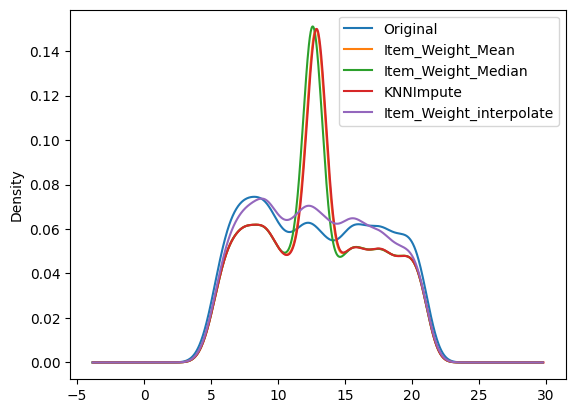

In [33]:
df_Train_copy['Item_Weight'].plot(kind="kde", label="Original")
df_Train_copy['Item_Weight_Mean'].plot(kind="kde", label="Item_Weight_Mean")
df_Train_copy['Item_Weight_Median'].plot(kind="kde", label="Item_Weight_Median")
KNNImputed['Item_Weight'].plot(kind="kde", label="KNNImpute")
df_Train_copy['Item_Weight_interpolate'].plot(kind="kde", label="Item_Weight_interpolate")

plt.legend()
plt.show()

In [34]:
KNNImputed = KNNImputed.rename(columns={'Item_Weight': 'Item_Weight_KNNImpute'}) 
KNNImputed.head()

,Item_Weight_KNNImpute
0,9.3
1,5.9
2,17.5
3,19.2
4,8.9


In [35]:
df_Train_copy.insert(loc=1, column='Item_Weight_KNNImpute', value=KNNImputed['Item_Weight_KNNImpute'])
#df_Train_copy_merge = pd.merge(df_Train_copy,KNNImputed,on="ID",how="inner")
#df_Train_copy_merge.info()
df_Train_copy.head()

,Item_Identifier,Item_Weight_KNNImpute,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Identifier,Store_age,Item_Weight_Mean,Item_Weight_Median,Item_Weight_interpolate
0,FDA15,9.3,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15-OUT049,27,9.30,9.30,9.30
1,DRC01,5.9,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01-OUT018,17,5.92,5.92,5.92
2,FDN15,17.5,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15-OUT049,27,17.50,17.50,17.50
3,FDX07,19.2,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FDX07-OUT010,28,19.20,19.20,19.20
4,NCD19,8.9,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19-OUT013,39,8.93,8.93,8.93


<Axes: >

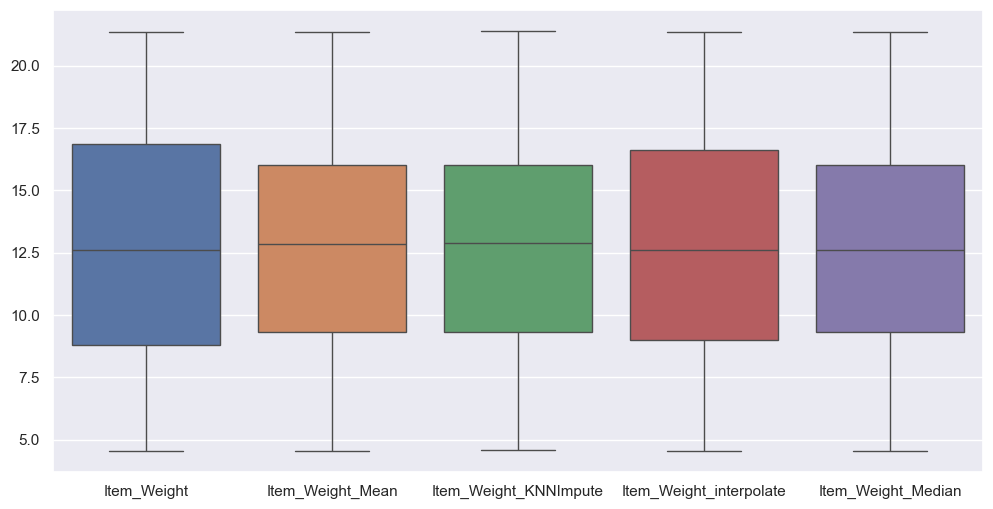

In [36]:
sns.set_theme(rc={'figure.figsize':(12,6)})
sns.boxplot(data=df_Train_copy[['Item_Weight', 'Item_Weight_Mean','Item_Weight_KNNImpute','Item_Weight_interpolate','Item_Weight_Median']])

In [37]:
df_Train_copy[['Item_Weight', 'Item_Weight_Mean','Item_Weight_KNNImpute','Item_Weight_interpolate','Item_Weight_Median']].describe().applymap('{:,.1f}'.format)

,Item_Weight,Item_Weight_Mean,Item_Weight_KNNImpute,Item_Weight_interpolate,Item_Weight_Median
count,"7,060.0","8,523.0","8,523.0","8,523.0","8,523.0"
mean,12.9,12.9,12.9,12.8,12.8
std,4.6,4.2,4.2,4.4,4.2
min,4.6,4.6,4.6,4.6,4.6
25%,8.8,9.3,9.3,9.0,9.3
50%,12.6,12.9,12.9,12.6,12.6
75%,16.9,16.0,16.0,16.6,16.0
max,21.4,21.4,21.4,21.4,21.4


#### Variable name: Outlet Size

In [38]:
df_Train_copy['Outlet_Size'].mode()[0]

'Medium'

In [39]:
df_Train_copy.groupby(['Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [40]:
#Filling the missing values in categorical variables by the Mode value of the variable based on the Store size
get_mode = lambda x: x.mode()[0]

df_Train_copy['Outlet_Size'] = df_Train_copy['Outlet_Size'].fillna(df_Train_copy.groupby('Outlet_Type')['Outlet_Size'].transform(get_mode))

In [41]:
#Filling the missing values in categorical variables by the group Mode value of the variable
#df_Train_copy['Outlet_Size'] = df_Train_copy['Outlet_Size'].fillna(df_Train_copy['Outlet_Size'].mode()[0])

In [42]:
print("Count total NaN at each column in the Train DataFrame: \n ", df_Train_copy.isnull().sum())

Count total NaN at each column in the Train DataFrame: 
  Item_Identifier                 0
Item_Weight_KNNImpute           0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Outlet_Identifier          0
Store_age                       0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_interpolate         0
dtype: int64


In [43]:
df_Train_copy= df_Train_copy.drop(['Item_Weight','Item_Weight_KNNImpute','Item_Weight_Median','Item_Weight_Mean'],axis=1)

# Rows in the dataset
print("number of rows in the Copy dataset : ", df_Train_copy.shape[0])

# Columns in the dataset
print("number of rows in the Copy dataset : ", df_Train_copy.shape[1])

df_Train_copy.head()

number of rows in the Copy dataset :  8523
number of rows in the Copy dataset :  14


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Identifier,Store_age,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15-OUT049,27,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01-OUT018,17,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15-OUT049,27,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FDX07-OUT010,28,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19-OUT013,39,8.93


### Key Points:
1. Item_Weight Missing values: Replacing the missing values with Mean or KNN Imputation yields the same as KNN performs imputation leveraging mean of the variable. Replacing with median results in slightly different result. However, **Interpolate** seems to be the best solution as it's closest to the original variable. Hence, recommend replacing missing values with the **interpolate** result. 
2. Outlet size Missing values: Replacing the missing values with median based on the Store size instead of group mean.
3. After performing the missing value treatment, the missing values are removed except in the original Item_Weight variable, which is removed.

### 5b) Other Data handling

In [44]:
event_dictionary ={'Low Fat':'Low_Fat', 'Regular':'Regular', 'LF':'Low_Fat', 'low fat':'Low_Fat', 'reg':'Regular'}

df_Train_copy['Item_Fat_Content_New'] = df_Train_copy['Item_Fat_Content'].map(event_dictionary)

df_Train_copy.groupby(['Item_Fat_Content_New','Item_Fat_Content']).agg({ 'Item_Outlet_Identifier': 'count'})

Item_Outlet_Identifier
Item_Fat_Content_New Item_Fat_Content                        
Low_Fat              LF                                   316
                     Low Fat                             5089
                     low fat                              112
Regular              Regular                             2889
                     reg                                  117

In [45]:
df_Train_copy= df_Train_copy.drop('Item_Fat_Content',axis=1)

# Rows in the dataset
print("number of rows in the Final Copy dataset : ", df_Train_copy.shape[0])

# Columns in the dataset
print("number of rows in the Final Copy dataset : ", df_Train_copy.shape[1])

df_Train_copy.head()

number of rows in the Final Copy dataset :  8523
number of rows in the Final Copy dataset :  14


,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Identifier,Store_age,Item_Weight_interpolate,Item_Fat_Content_New
0,FDA15,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15-OUT049,27,9.30,Low_Fat
1,DRC01,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01-OUT018,17,5.92,Regular
2,FDN15,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15-OUT049,27,17.50,Low_Fat
3,FDX07,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FDX07-OUT010,28,19.20,Regular
4,NCD19,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19-OUT013,39,8.93,Low_Fat


In [46]:
print("Count total NaN at each column in the Train DataFrame: \n ", df_Train_copy.isnull().sum())

Count total NaN at each column in the Train DataFrame: 
  Item_Identifier              0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Outlet_Identifier       0
Store_age                    0
Item_Weight_interpolate      0
Item_Fat_Content_New         0
dtype: int64


#### No Missing value in any of the variables anymore

## 6) Data Processing for Model building 

In [47]:
df_Train_copy_v2=df_Train_copy.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Identifier'], axis=1)

In [48]:
df_Train_copy_v2 = pd.get_dummies(df_Train_copy_v2, drop_first = True)

# Rows in the dataset
print("number of rows in the Final Copy dataset : ", df_Train_copy_v2.shape[0])

# Columns in the dataset
print("number of columns in the Final Copy dataset : ", df_Train_copy_v2.shape[1])

df_Train_copy_v2.head()

number of rows in the Final Copy dataset :  8523
number of columns in the Final Copy dataset :  28


,Item_Visibility,Item_MRP,Item_Outlet_Sales,Store_age,Item_Weight_interpolate,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_New_Regular
0,0.016047,249.8092,3735.1380,27,9.30,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
1,0.019278,48.2692,443.4228,17,5.92,False,False,False,False,False,...,True,False,True,False,False,True,False,True,False,True
2,0.016760,141.6180,2097.2700,27,17.50,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
3,0.000000,182.0950,732.3800,28,19.20,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,0.000000,53.8614,994.7052,39,8.93,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [49]:
df_Train_copy_v2 = df_Train_copy_v2.astype({'Item_Type_Breads': int, 'Item_Type_Breakfast': int,'Item_Type_Canned':int,'Item_Type_Dairy':int,'Item_Type_Frozen Foods':int,'Item_Type_Fruits and Vegetables':int,'Item_Type_Hard Drinks':int,'Item_Type_Health and Hygiene':int,'Item_Type_Household':int,'Item_Type_Meat':int,'Item_Type_Others':int,'Item_Type_Seafood':int,'Item_Type_Snack Foods':int,'Item_Type_Soft Drinks':int,'Item_Type_Starchy Foods':int,'Outlet_Size_Medium':int,'Outlet_Size_Small':int,'Outlet_Location_Type_Tier 2':int,'Outlet_Location_Type_Tier 3':int,'Outlet_Type_Supermarket Type1':int,'Outlet_Type_Supermarket Type2':int,'Outlet_Type_Supermarket Type3':int,'Item_Fat_Content_New_Regular':int})
df_Train_copy_v2.head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Store_age,Item_Weight_interpolate,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_New_Regular
0,0.016047,249.8092,3735.1380,27,9.30,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,0.019278,48.2692,443.4228,17,5.92,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,0.016760,141.6180,2097.2700,27,17.50,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0.000000,182.0950,732.3800,28,19.20,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0.000000,53.8614,994.7052,39,8.93,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [50]:
np.round(df_Train_copy_v2["Item_Outlet_Sales"].describe(),2)

count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

In [51]:
df_Train_copy_v2['price_cat'] = pd.cut(df_Train_copy_v2['Item_Outlet_Sales'],
                               bins=[0., 835.00,1800.00, 3100.00,np.inf],
                               labels=[1, 2, 3, 4])

In [52]:
df_Train_copy_v2['price_cat'].value_counts().sort_index(ascending=True)

price_cat
1    2136
2    2140
3    2115
4    2132
Name: count, dtype: int64

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=2, 
                               test_size=0.3, 
                               random_state=42)
split

StratifiedShuffleSplit(n_splits=2, random_state=42, test_size=0.3,
            train_size=None)

In [54]:
for train_index, test_index in split.split(df_Train_copy_v2, df_Train_copy_v2['price_cat']):
    train_data = df_Train_copy_v2.loc[train_index]
    test_data = df_Train_copy_v2.loc[test_index]

In [55]:
train_index
test_index

array([1875,  385, 2572, ..., 5886, 7063, 3086], dtype=int64)

array([4254, 5463, 5249, ..., 4195, 6398, 7300], dtype=int64)

In [56]:
print("Main dataset rows:", df_Train_copy_v2.shape[0],"And columns:", df_Train_copy_v2.shape[1])
print("Training dataset rows:",train_data.shape[0],"And columns:", train_data.shape[1])
print("Test dataset rows:",test_data.shape[0],"And columns:", test_data.shape[1])
train_data.head()
test_data.head()

Main dataset rows: 8523 And columns: 29
Training dataset rows: 5966 And columns: 29
Test dataset rows: 2557 And columns: 29


,Item_Visibility,Item_MRP,Item_Outlet_Sales,Store_age,Item_Weight_interpolate,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_New_Regular,price_cat
1875,0.106894,260.4594,1046.6376,28,14.50,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,2
385,0.026605,86.2198,610.5386,22,15.25,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
2572,0.054584,193.3820,4247.8040,22,20.10,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,4
427,0.015624,182.6266,3135.2522,17,17.50,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,4
2103,0.022941,241.8538,5768.4912,29,20.25,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,4


,Item_Visibility,Item_MRP,Item_Outlet_Sales,Store_age,Item_Weight_interpolate,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_New_Regular,price_cat
4254,0.109668,166.0816,671.1264,28,19.350,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
5463,0.000000,248.8092,6723.2484,22,12.600,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,4
5249,0.168871,34.3874,670.4606,17,7.155,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,1
374,0.041948,41.2112,809.6128,39,6.785,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
6773,0.079281,100.1042,892.8378,22,20.700,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,2


In [57]:
#Dropping price_cat column across all datasets
df_Train_copy_v2=df_Train_copy_v2.drop('price_cat',axis=1)
train_data=train_data.drop('price_cat',axis=1)
test_data=test_data.drop('price_cat',axis=1)

In [58]:
Y_train = train_data["Item_Outlet_Sales"].copy()
X_train = train_data.drop(['Item_Outlet_Sales'], axis=1)
print("Training dataset rows:",X_train.shape[0],"And columns:", X_train.shape[1])
Y_train.head(2)
X_train.head(2)

Training dataset rows: 5966 And columns: 27


1875    1046.6376
385      610.5386
Name: Item_Outlet_Sales, dtype: float64

,Item_Visibility,Item_MRP,Store_age,Item_Weight_interpolate,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_New_Regular
1875,0.106894,260.4594,28,14.50,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
385,0.026605,86.2198,22,15.25,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0


In [59]:
#file_name = 'X_train.xlsx'
 
# saving the excel
#X_train.to_excel(file_name)

In [60]:
Y_test = test_data["Item_Outlet_Sales"].copy()
X_test = test_data.drop(['Item_Outlet_Sales'], axis=1)
print("Testing dataset rows:",X_test.shape[0],"And columns:", X_test.shape[1])
X_test.head(2)

Testing dataset rows: 2557 And columns: 27


,Item_Visibility,Item_MRP,Store_age,Item_Weight_interpolate,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_New_Regular
4254,0.109668,166.0816,28,19.35,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
5463,0.000000,248.8092,22,12.60,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,0,1


## 7) Model development

### 7a) Linear regression model

In [61]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

#### RMSE and Mean Absolute error in Training & Test datasets

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

LR_predictions = lin_reg.predict(X_train)

#Mean Squared Error
lin_mse = mean_squared_error(Y_train, LR_predictions)
lin_rmse = np.sqrt(lin_mse)

print("RMSE in TRAINING dataset:",np.round(lin_rmse,1))

#Mean Absolute Error
lin_mae = mean_absolute_error(Y_train,LR_predictions)

print("Mean Absolute Error in TRAINING dataset:",np.round(lin_mae,1))

RMSE in TRAINING dataset: 1133.0
Mean Absolute Error in TRAINING dataset: 835.7


In [63]:
LR_predictions_Test = lin_reg.predict(X_test)

#Mean Squared Error
lin_mse_test = mean_squared_error(Y_test, LR_predictions_Test)
lin_rmse_test = np.sqrt(lin_mse_test)

print("RMSE in TEST dataset:",np.round(lin_rmse_test,1))

#Mean Absolute Error
lin_mae_test = mean_absolute_error(Y_test,LR_predictions_Test)

print("Mean Absolute Error in TRAINING dataset:",np.round(lin_mae_test,1))

RMSE in TEST dataset: 1117.2
Mean Absolute Error in TRAINING dataset: 838.6


#### R-square in Training and Test datasets

In [64]:
from sklearn.metrics import r2_score
lin_train_r2=r2_score(Y_train,LR_predictions)
lin_test_r2=r2_score(Y_test,LR_predictions_Test)

print("Training dataset R-squared value using Linear model:",np.round(lin_train_r2*100,2))

print("Test dataset R-squared value using Linear model:",np.round(lin_test_r2*100,2))

Training dataset R-squared value using Linear model: 56.36
Test dataset R-squared value using Linear model: 56.1


#### Linear regression Cross-validation

In [65]:
from sklearn.model_selection import cross_val_score

lin_reg_CV = cross_val_score(lin_reg, X_train, Y_train,
                             scoring="neg_mean_squared_error", cv=5)
lin_reg_CV_scores = np.sqrt(-lin_reg_CV)

print("Avg. RMSE in 5-fold CV dataset:",np.round(lin_reg_CV_scores.mean(),1))
print("STD DEV RMSE in 5-fold CV dataset:",np.round(lin_reg_CV_scores.std(),1))

Avg. RMSE in 5-fold CV dataset: 1138.4
STD DEV RMSE in 5-fold CV dataset: 24.6


#### MAPE in Training & Test datasets

In [66]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [67]:
line_reg_train_mape = mean_absolute_percentage_error(Y_train,LR_predictions)
line_reg_test_mape = mean_absolute_percentage_error(Y_test,LR_predictions_Test)

print("Linear regression Training MAPE%:", np.round(line_reg_train_mape,2))
print("Linear regression Test MAPE%:", np.round(line_reg_test_mape,2))

Linear regression Training MAPE%: 103.52
Linear regression Test MAPE%: 99.84


#### Very high MAPE, indicating either severe over or under forecast using Linear regression

### 7b) Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators=30,random_state=30,oob_score = True,max_depth=4)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=4, n_estimators=30, oob_score=True,
                      random_state=30)

In [69]:
RF_predictions = rf.predict(X_train)

#Mean Squared Error
RF_mse = mean_squared_error(Y_train, RF_predictions)
RF_rmse = np.sqrt(RF_mse)

print("RMSE in TRAINING dataset:",np.round(RF_rmse,1))

#Mean Absolute Error
RF_mae = mean_absolute_error(Y_train,RF_predictions)

print("Mean Absolute Error in TRAINING dataset:",np.round(RF_mae,1))

RMSE in TRAINING dataset: 1095.3
Mean Absolute Error in TRAINING dataset: 793.0


In [70]:
RF_predictions_Test = rf.predict(X_test)

#Mean Squared Error
RF_mse_test = mean_squared_error(Y_test, RF_predictions_Test)
RF_rmse_test = np.sqrt(RF_mse_test)

print("RMSE in TEST dataset:",np.round(RF_rmse_test,1))

#Mean Absolute Error
RF_mae_test = mean_absolute_error(Y_test,RF_predictions_Test)

print("Mean Absolute Error in TRAINING dataset:",np.round(RF_mae_test,1))

RMSE in TEST dataset: 1083.6
Mean Absolute Error in TRAINING dataset: 787.5


In [71]:
RF_train_r2=r2_score(Y_train,RF_predictions)
RF_test_r2=r2_score(Y_test,RF_predictions_Test)

print("Training dataset R-squared value using Random Forest:",np.round(RF_train_r2*100,2))

print("Test dataset R-squared value using Random Forest:",np.round(RF_test_r2*100,2))

Training dataset R-squared value using Random Forest: 59.21
Test dataset R-squared value using Random Forest: 58.7


In [72]:
feature_importances=rf.feature_importances_
feature_importances

array([1.76470854e-03, 5.42013773e-01, 1.42948285e-02, 1.87446147e-03,
       6.74315241e-04, 1.30061472e-04, 0.00000000e+00, 5.99361900e-04,
       0.00000000e+00, 2.01661504e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.59533103e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.86653601e-02,
       2.04274807e-02, 0.00000000e+00, 0.00000000e+00, 1.66419574e-01,
       2.25505257e-02, 2.00287935e-01, 0.00000000e+00])

In [73]:
#Table having the Top Features of Random Forest model

feature_importances_df = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)
feature_importances_df.to_frame().reset_index()

,index,0
0,Item_MRP,0.542014
1,Outlet_Type_Supermarket Type3,0.200288
2,Outlet_Type_Supermarket Type1,0.166420
3,Outlet_Size_Medium,0.028665
4,Outlet_Type_Supermarket Type2,0.022551
5,Outlet_Size_Small,0.020427
6,Store_age,0.014295
7,Item_Weight_interpolate,0.001874
8,Item_Visibility,0.001765
9,Item_Type_Breads,0.000674


In [74]:
RF_train_mape = mean_absolute_percentage_error(Y_train, RF_predictions)
RF_test_mape = mean_absolute_percentage_error(Y_test, RF_predictions_Test)

print("Random Forest Training MAPE:", np.round(RF_train_mape,2))
print("Random Forest Test MAPE:", np.round(RF_test_mape,2))

Random Forest Training MAPE: 76.85
Random Forest Test MAPE: 74.67


### 7c) XGBoost Regressor

In [75]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgboost_int = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=100, random_state=42)
xgboost_int.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [76]:
xgb_importance = xgboost_int.get_booster().get_score(importance_type='weight')

#XGBoost top features from the initial XGBoost run
xgb_importance_df = pd.DataFrame({
    'Feature': list(xgb_importance.keys()),
    'Importance': list(xgb_importance.values())
}).sort_values(by='Importance', ascending=False)

xgb_importance_df

,Feature,Importance
1,Item_MRP,1446.0
0,Item_Visibility,1189.0
3,Item_Weight_interpolate,866.0
2,Store_age,611.0
20,Outlet_Size_Small,77.0
19,Outlet_Size_Medium,76.0
9,Item_Type_Fruits and Vegetables,72.0
23,Outlet_Type_Supermarket Type1,71.0
16,Item_Type_Snack Foods,71.0
25,Item_Fat_Content_New_Regular,70.0


In [77]:
#Optimizing XG Boost using Gridsearch using the best values of the hyperparameters.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [10,30,60,90,100]
}

grid_search = GridSearchCV(
    estimator=xgboost_int, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [10, 30, 60, 90, 100],
                         'subsample': [0.8, 1.0]},
             verbose=1)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 30, 'subsample': 1.0}


In [78]:
#Refine XG Boost model with 
#(a) the Best Parameters and 
#(b) top features common between Random forest and XG Boost initial run
X_train_new=X_train[['Item_MRP','Store_age','Outlet_Size_Medium','Outlet_Size_Small','Outlet_Type_Supermarket Type1','Item_Weight_interpolate','Item_Visibility','Item_Type_Fruits and Vegetables']]

X_test_new=X_test[['Item_MRP','Store_age','Outlet_Size_Medium','Outlet_Size_Small','Outlet_Type_Supermarket Type1','Item_Weight_interpolate','Item_Visibility','Item_Type_Fruits and Vegetables']]

xgboost = xgb.XGBRegressor(objective='reg:squarederror',max_depth=3,learning_rate=0.2,subsample=1.0,colsample_bytree=0.8 ,
                         n_estimators=30, random_state=42)
xgboost.fit(X_train_new, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [79]:
XGB_predictions = xgboost.predict(X_train_new)

#Mean Squared Error
XGB_mse = mean_squared_error(Y_train, XGB_predictions)
XGB_rmse = np.sqrt(XGB_mse)

print("RMSE in TRAINING dataset:",np.round(XGB_rmse,1))

#Mean Absolute Error
XGB_mae = mean_absolute_error(Y_train,XGB_predictions)

print("Mean Absolute Error in TRAINING dataset:",np.round(XGB_mae,1))

RMSE in TRAINING dataset: 1067.3
Mean Absolute Error in TRAINING dataset: 761.6


In [80]:
XGB_predictions_Test = xgboost.predict(X_test_new)

#Mean Squared Error
XGB_mse_test = mean_squared_error(Y_test, XGB_predictions_Test)
XGB_rmse_test = np.sqrt(XGB_mse_test)

print("RMSE in TEST dataset:",np.round(XGB_rmse_test,1))

#Mean Absolute Error
XGB_mae_test = mean_absolute_error(Y_test,XGB_predictions_Test)

print("Mean Absolute Error in TRAINING dataset:",np.round(XGB_mae_test,1))

RMSE in TEST dataset: 1064.5
Mean Absolute Error in TRAINING dataset: 773.8


In [81]:
XGB_train_r2=r2_score(Y_train,XGB_predictions)
XGB_test_r2=r2_score(Y_test,XGB_predictions_Test)

print("Training dataset R-squared value using XG Boost Regressor:",np.round(XGB_train_r2*100,2))

print("Test dataset R-squared value using XG Boost Regressor:",np.round(XGB_test_r2*100,2))

Training dataset R-squared value using XG Boost Regressor: 61.27
Test dataset R-squared value using XG Boost Regressor: 60.14


In [82]:
XGB_train_mape = mean_absolute_percentage_error(Y_train, XGB_predictions)
XGB_test_mape = mean_absolute_percentage_error(Y_test, XGB_predictions_Test)

print("XG Boost Regression Training MAPE:", np.round(XGB_train_mape,2))
print("XG Boost Regression Test MAPE:", np.round(XGB_test_mape,2))

XG Boost Regression Training MAPE: 68.73
XG Boost Regression Test MAPE: 70.11


In [83]:
xgb_importance = xgboost.get_booster().get_score(importance_type='weight')

#XGBoost top features from the final optimized XGBoost run
xgb_importance_df = pd.DataFrame({
    'Feature': list(xgb_importance.keys()),
    'Importance': list(xgb_importance.values())
}).sort_values(by='Importance', ascending=False)

xgb_importance_df

,Feature,Importance
0,Item_MRP,71.0
1,Store_age,41.0
6,Item_Visibility,32.0
2,Outlet_Size_Medium,18.0
5,Item_Weight_interpolate,18.0
4,Outlet_Type_Supermarket Type1,16.0
3,Outlet_Size_Small,10.0
7,Item_Type_Fruits and Vegetables,3.0


<Figure size 1000x800 with 0 Axes>

<BarContainer object of 8 artists>

Text(0.5, 0, 'Importance Score')

Text(0.5, 1.0, 'Top Feature Importance')

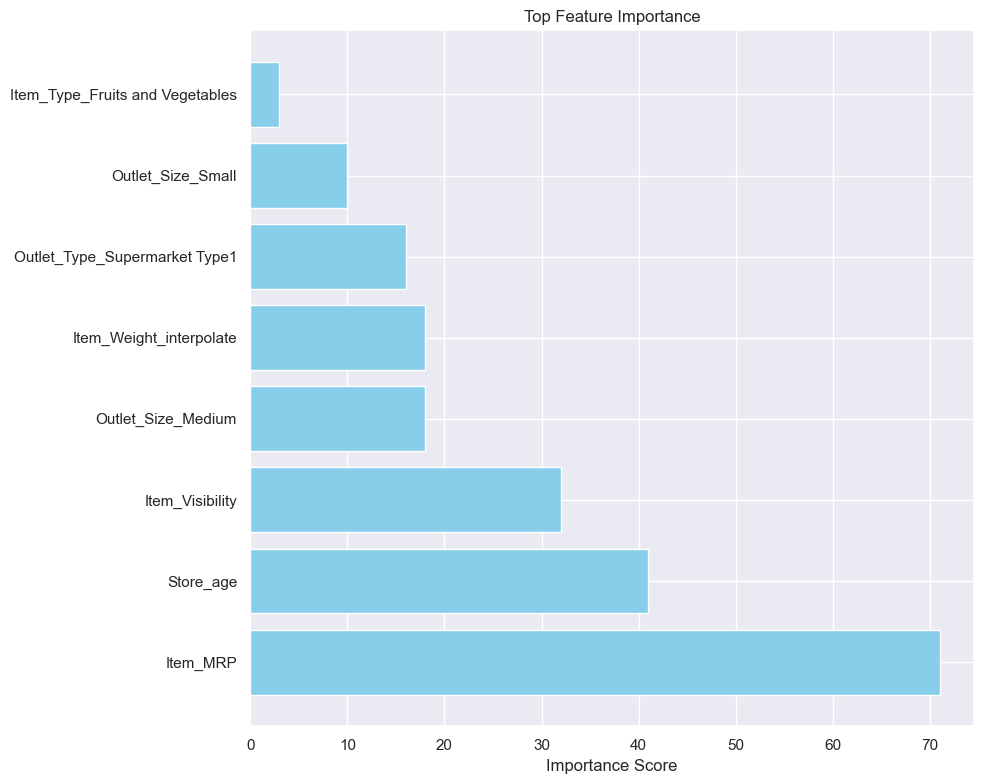

In [84]:
plt.figure(figsize=(10, 8))
plt.barh(
    xgb_importance_df['Feature'],
    xgb_importance_df['Importance'],
    color='skyblue'
)
plt.xlabel('Importance Score')
plt.title(f'Top Feature Importance')
plt.tight_layout()
plt.show()

### 7d) Decision Tree Regressor

In [85]:
from sklearn.tree import DecisionTreeRegressor

DT_reg = DecisionTreeRegressor(max_depth=4, random_state=30)
DT_reg.fit(X_train, Y_train)

#Note: Experimented with max depth of 3, 4 and 5. Max depth of 4 is giving the best result in terms of R-squared, MAPE 
#and prediction results. Hence, finalized the Decision Tree regressor with max depth of 4.

DecisionTreeRegressor(max_depth=4, random_state=30)

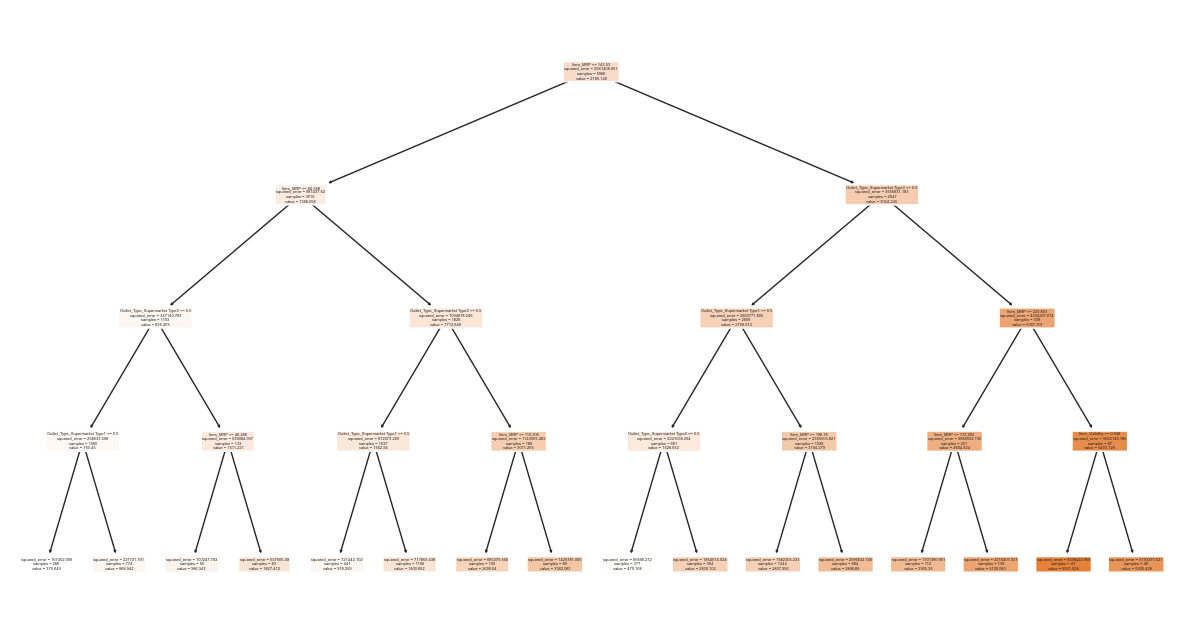

In [86]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.subplots(figsize=(15,8))

plot_tree(DT_reg,
         feature_names=X_train.columns,
         rounded=True,
         filled=True);

In [87]:
DT_predictions = DT_reg.predict(X_train)

#Mean Squared Error
DT_mse = mean_squared_error(Y_train, DT_predictions)
DT_rmse = np.sqrt(DT_mse)

print("RMSE in TRAINING dataset:",np.round(DT_rmse,1))

#Mean Absolute Error
DT_mae = mean_absolute_error(Y_train,DT_predictions)

print("Mean Absolute Error in TRAINING dataset:",np.round(DT_mae,1))

RMSE in TRAINING dataset: 1110.7
Mean Absolute Error in TRAINING dataset: 806.9


In [88]:
DT_predictions_test = DT_reg.predict(X_test)

DT_mse_test = mean_squared_error(Y_test, DT_predictions_test)
DT_rmse_test = np.sqrt(DT_mse_test)

print("RMSE in TEST dataset:",np.round(DT_rmse_test,1))

#Mean Absolute Error
DT_mae_test = mean_absolute_error(Y_test,DT_predictions_test)

print("Mean Absolute Error in TEST dataset:",np.round(DT_mae_test,1))

RMSE in TEST dataset: 1105.0
Mean Absolute Error in TEST dataset: 805.4


In [89]:
DT_train_r2=r2_score(Y_train,DT_predictions)
DT_test_r2=r2_score(Y_test,DT_predictions_test)

print("Training dataset R-squared value using Decision Tree Regressor:",np.round(DT_train_r2*100,2))

print("Test dataset R-squared value using Decision Tree Regressor:",np.round(DT_test_r2*100,2))

Training dataset R-squared value using Decision Tree Regressor: 58.06
Test dataset R-squared value using Decision Tree Regressor: 57.05


In [90]:
DT_train_mape = mean_absolute_percentage_error(Y_train, DT_predictions)
DT_test_mape = mean_absolute_percentage_error(Y_test, DT_predictions_test)

print("Decision Tree Regressor Regression Training MAPE:", np.round(DT_train_mape,2))
print("Decision Tree Regressor Regression Test MAPE:", np.round(DT_test_mape,2))

Decision Tree Regressor Regression Training MAPE: 76.15
Decision Tree Regressor Regression Test MAPE: 74.56


## 8) Preparing the Test dataset for prediction

In [91]:
df_Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Identifier
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,FDW58-OUT049
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,FDW14-OUT017
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NCN55-OUT010
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,FDQ58-OUT017
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,FDY38-OUT027


In [92]:
#Creating Store_age variable in the Test (to be used for Prediction)
import datetime as dt
current_year = dt.datetime.today().year
current_year
df_Test['Store_age'] = current_year - df_Test['Outlet_Establishment_Year']
df_Test.head()

2026

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Identifier,Store_age
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,FDW58-OUT049,27
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,FDW14-OUT017,19
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NCN55-OUT010,28
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,FDQ58-OUT017,19
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,FDY38-OUT027,41


In [93]:
df_Test_copy = df_Test.copy(deep = True)

In [94]:
#Handling missing values in the Test (to be used for Prediction)
#For Item weight
df_Test_copy['Item_Weight_interpolate'] = df_Test_copy['Item_Weight'].interpolate(method="linear")

#For Store size
get_mode = lambda x: x.mode()[0]

df_Test_copy['Outlet_Size'] = df_Test_copy['Outlet_Size'].fillna(df_Test_copy.groupby('Outlet_Type')['Outlet_Size'].transform(get_mode))

In [95]:
event_dictionary1 ={'Low Fat':'Low_Fat', 'Regular':'Regular', 'LF':'Low_Fat', 'low fat':'Low_Fat', 'reg':'Regular'}

df_Test_copy['Item_Fat_Content_New'] = df_Test_copy['Item_Fat_Content'].map(event_dictionary1)

In [96]:
df_Test_copy.groupby(['Item_Fat_Content_New','Item_Fat_Content']).agg({ 'Item_Outlet_Identifier': 'count'})

Item_Outlet_Identifier
Item_Fat_Content_New Item_Fat_Content                        
Low_Fat              LF                                   206
                     Low Fat                             3396
                     low fat                               66
Regular              Regular                             1935
                     reg                                   78

In [97]:
df_Test_copy= df_Test_copy.drop(['Item_Weight','Item_Fat_Content'],axis=1)
print("Count total NaN at each column in the Test DataFrame for Prediction: \n ", df_Test_copy.isnull().sum())
# Rows in the dataset
print("number of rows in the Copy dataset : ", df_Test_copy.shape[0])

# Columns in the dataset
print("number of rows in the Copy dataset : ", df_Test_copy.shape[1])

df_Test_copy.head()

Count total NaN at each column in the Test DataFrame for Prediction: 
  Item_Identifier              0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Identifier       0
Store_age                    0
Item_Weight_interpolate      0
Item_Fat_Content_New         0
dtype: int64
number of rows in the Copy dataset :  5681
number of rows in the Copy dataset :  13


,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Identifier,Store_age,Item_Weight_interpolate,Item_Fat_Content_New
0,FDW58,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,FDW58-OUT049,27,20.7500,Low_Fat
1,FDW14,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,FDW14-OUT017,19,8.3000,Regular
2,NCN55,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,NCN55-OUT010,28,14.6000,Low_Fat
3,FDQ58,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,FDQ58-OUT017,19,7.3150,Low_Fat
4,FDY38,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,FDY38-OUT027,41,8.5575,Regular


#### No missing values in any variable of the Test dataset to be used for prediction

In [98]:
X_For_Pred = df_Test_copy.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Identifier','Outlet_Establishment_Year'], axis=1)
X_For_Pred.head()

,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Store_age,Item_Weight_interpolate,Item_Fat_Content_New
0,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,27,20.7500,Low_Fat
1,0.038428,Dairy,87.3198,Small,Tier 2,Supermarket Type1,19,8.3000,Regular
2,0.099575,Others,241.7538,Small,Tier 3,Grocery Store,28,14.6000,Low_Fat
3,0.015388,Snack Foods,155.0340,Small,Tier 2,Supermarket Type1,19,7.3150,Low_Fat
4,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,41,8.5575,Regular


In [99]:
X_For_Pred = pd.get_dummies(X_For_Pred, drop_first = True)
X_For_Pred.head()

,Item_Visibility,Item_MRP,Store_age,Item_Weight_interpolate,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_New_Regular
0,0.007565,107.8622,27,20.7500,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,0.038428,87.3198,19,8.3000,False,False,False,True,False,False,...,False,False,False,True,True,False,True,False,False,True
2,0.099575,241.7538,28,14.6000,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3,0.015388,155.0340,19,7.3150,False,False,False,False,False,False,...,False,False,False,True,True,False,True,False,False,False
4,0.118599,234.2300,41,8.5575,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,True,True


In [100]:
X_For_Pred = X_For_Pred.astype({'Item_Type_Breads': int, 'Item_Type_Breakfast': int,'Item_Type_Canned':int,'Item_Type_Dairy':int,'Item_Type_Frozen Foods':int,'Item_Type_Fruits and Vegetables':int,'Item_Type_Hard Drinks':int,'Item_Type_Health and Hygiene':int,'Item_Type_Household':int,'Item_Type_Meat':int,'Item_Type_Others':int,'Item_Type_Seafood':int,'Item_Type_Snack Foods':int,'Item_Type_Soft Drinks':int,'Item_Type_Starchy Foods':int,'Outlet_Size_Medium':int,'Outlet_Size_Small':int,'Outlet_Location_Type_Tier 2':int,'Outlet_Location_Type_Tier 3':int,'Outlet_Type_Supermarket Type1':int,'Outlet_Type_Supermarket Type2':int,'Outlet_Type_Supermarket Type3':int,'Item_Fat_Content_New_Regular':int})
X_For_Pred.head()

,Item_Visibility,Item_MRP,Store_age,Item_Weight_interpolate,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_New_Regular
0,0.007565,107.8622,27,20.7500,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.038428,87.3198,19,8.3000,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,1
2,0.099575,241.7538,28,14.6000,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.015388,155.0340,19,7.3150,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
4,0.118599,234.2300,41,8.5575,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1


In [101]:
#Keeping only the variables used in the XG Boost model in the Test data for prediction if XGBoost results are to be used for prediction.
X_For_Pred_New=X_For_Pred[['Item_MRP','Store_age','Outlet_Size_Medium','Outlet_Size_Small','Outlet_Type_Supermarket Type1','Item_Weight_interpolate','Item_Visibility','Item_Type_Fruits and Vegetables']]
X_For_Pred_New.head()

,Item_MRP,Store_age,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Item_Weight_interpolate,Item_Visibility,Item_Type_Fruits and Vegetables
0,107.8622,27,1,0,1,20.7500,0.007565,0
1,87.3198,19,0,1,1,8.3000,0.038428,0
2,241.7538,28,0,1,0,14.6000,0.099575,0
3,155.0340,19,0,1,1,7.3150,0.015388,0
4,234.2300,41,1,0,0,8.5575,0.118599,0


## 9) Predicting in the Test data for Final Submission

#### Using Decision Tree regressor as the final solution since it's giving the best prediction outcome in the hackathon challenge, even though XG Boost regressor has better R-square and MAPE values.
#### Also, the R-squared and MAPE don't deteriorate much in the Test dataset compared to the Training dataset during modeling, indicating this model doesn't overfit.

In [102]:
y_Pred = DT_reg.predict(X_For_Pred)

In [103]:
Prediction=pd.DataFrame(y_Pred)
Prediction.info()
Prediction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5681 non-null   float64
dtypes: float64(1)
memory usage: 44.5 KB


,0
0,1800.652203
1,1800.652203
2,479.167606
3,2807.955838
4,5905.428891


In [104]:
df_Test_ID=df_Test[['Item_Identifier','Outlet_Identifier']].copy()
df_Test_ID.info()
df_Test_ID.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Identifier    5681 non-null   object
 1   Outlet_Identifier  5681 non-null   object
dtypes: object(2)
memory usage: 88.9+ KB


,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [105]:
Prediction_v2=pd.concat([df_Test_ID, Prediction], axis=1)
Prediction_v2.head()

,Item_Identifier,Outlet_Identifier,0
0,FDW58,OUT049,1800.652203
1,FDW14,OUT017,1800.652203
2,NCN55,OUT010,479.167606
3,FDQ58,OUT017,2807.955838
4,FDY38,OUT027,5905.428891


In [106]:
Prediction_v3 = Prediction_v2.rename(columns={0:'Item_Outlet_Sales'})
Prediction_v3.info()
Prediction_v3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Identifier    5681 non-null   object 
 1   Outlet_Identifier  5681 non-null   object 
 2   Item_Outlet_Sales  5681 non-null   float64
dtypes: float64(1), object(2)
memory usage: 133.3+ KB


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1800.652203
1,FDW14,OUT017,1800.652203
2,NCN55,OUT010,479.167606
3,FDQ58,OUT017,2807.955838
4,FDY38,OUT027,5905.428891


In [107]:
Prediction_v3['Item_Outlet_Sales'].describe()

count    5681.000000
mean     2187.520627
std      1291.477106
min       375.648550
25%       918.258980
50%      1800.652203
75%      2807.955838
max      6961.523605
Name: Item_Outlet_Sales, dtype: float64

In [108]:
mean_sales = Prediction_v3['Item_Outlet_Sales'].mean()
median_sales = Prediction_v3['Item_Outlet_Sales'].median()

mean_sales
median_sales

2187.5206274246443

1800.6522031772554

In [109]:
#Prediction_v3['Item_Outlet_Sales'] = Prediction_v3['Item_Outlet_Sales'].mask(Prediction_v3['Item_Outlet_Sales'] < 0, np.nan)

#Mean
#Prediction_v3['Item_Outlet_Sales'] = Prediction_v3['Item_Outlet_Sales'].fillna(mean_sales)

#Median
#Prediction_v3['Item_Outlet_Sales'] = Prediction_v3['Item_Outlet_Sales'].fillna(median_sales)

#Interpolate
#Prediction_v3['Item_Outlet_Sales'] = Prediction_v3['Item_Outlet_Sales'].interpolate(method='linear')

#Prediction_v3.head()

In [110]:
#Prediction_v3['Item_Outlet_Sales'].describe()

In [111]:
#Prediction_v3.head()

In [112]:
file_name = 'Final_Submission_Pusparghya_Pakrasi.csv'
 
# saving the excel
Prediction_v3.to_csv(file_name)